In [4]:
import pandas as pd
import numpy as np
import json


In [62]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
with open('Philips-juicer.json') as f:
  data = json.load(f)

In [16]:
actual_data=data[0]

In [24]:
reviews_details=actual_data['reviews']

In [25]:
reviews_details[0]

{'Country': 'India',
 'Date': ' 26 October 2018',
 'Helpfull-Vote': '127',
 'Rating': 1,
 'Review': 'The juicer is of very poor quality plastic and material. See pics attached of new one and a 1 year old one.Philips in ruining their name with such quality.',
 'ReviewTitle': 'Phlipls cheap qualityplastic and poor juicer',
 'Username': 'AJ',
 'Verification': 'Verified Purchase',
 'imgs': ['https://images-na.ssl-images-amazon.com/images/I/81TUeehxxGL._SY88.jpg',
  'https://images-na.ssl-images-amazon.com/images/I/81vqJwKI9oL._SY88.jpg'],
 'no_of_Comments': '1',
 'video': 'No Video'}

In [28]:
reviews=[]
review_title=[]
for i in reviews_details:
  reviews.append(i['Review'])
  review_title.append(i['ReviewTitle'])


In [29]:
len(reviews)

1627

In [30]:
len(review_title)

1627

In [35]:
reviews_length=[]
reviews_title_length=[]
for i in reviews:
  reviews_length.append(len(i))
for i in review_title:
  reviews_title_length.append(len(i))

In [32]:
sum(reviews_length)/len(reviews_length)

132.53472649047328

In [36]:
sum(reviews_title_length)/len(reviews_title_length)

20.80885064535956

In [37]:
df=pd.DataFrame()

In [38]:
df['reviews']=reviews
df['review_title']=review_title
df['reviews_length']=reviews_length
df['reviews_title_length']=reviews_title_length

In [41]:
df['reviews_length'].describe()

count    1627.000000
mean      132.534726
std       233.120619
min         0.000000
25%        22.000000
50%        58.000000
75%       152.000000
max      3559.000000
Name: reviews_length, dtype: float64

In [43]:
np.percentile(reviews_length,99)

951.1000000000001

In [45]:
freq = pd.Series(' '.join(df['reviews']).split()).value_counts()[:20]

In [46]:
#Hishest used words in review
freq

the        1275
and        1104
to         1092
is          869
of          653
a           635
it          632
I           572
for         556
product     454
juice       448
in          443
juicer      373
this        368
not         328
very        317
with        300
good        293
easy        281
have        257
dtype: int64

In [48]:
freq1 =  pd.Series(' '.join(df 
         ['reviews']).split()).value_counts()[-20:]

In [49]:
#Least used words in reviews
freq1

1.5-2.0L         1
,removes         1
dismantle.       1
domestic         1
scratched        1
Asked            1
effects          1
health..         1
material,        1
sound.other      1
Pros:Powerful    1
swift            1
reaches          1
Replacement      1
good..but        1
mot              1
15th             1
healthy,         1
everything,      1
disheartened     1
dtype: int64

In [50]:
freq = pd.Series(' '.join(df['review_title']).split()).value_counts()[:20]

In [51]:
#Highest used words in review title
freq

Stars        319
product      223
Five         218
Good         151
and          132
juicer       124
to           117
the          107
is           105
for           89
good          83
Four          79
...           64
Very          59
Excellent     55
Nice          55
it            55
of            54
very          54
Best          53
dtype: int64

In [52]:
freq1 =  pd.Series(' '.join(df 
         ['review_title']).split()).value_counts()[-20:]

In [53]:
#Least used words in review title
freq1

fullest        1
says.          1
Costly         1
wonderful      1
request        1
complete       1
results!       1
JUICER...      1
conveneinet    1
doable         1
Making         1
Thick          1
jiffy          1
allow          1
thanks         1
devil          1
call           1
Strongly       1
Probably       1
technician     1
dtype: int64

In [55]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [59]:
#Stemming and Lemmatization
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "running"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: run
lemmatization: run


In [63]:
stop_words = set(stopwords.words("english"))

In [64]:
#Preprocessing reviews
corpus = []
for i in reviews:
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', i)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [68]:
corpus[10]

'juicer poor quality plastic material see pic attached new one year old one philip ruining name quality'

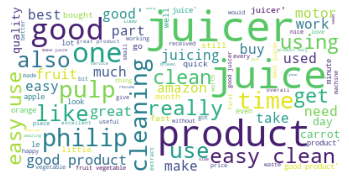

In [69]:
#Wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [71]:
list(cv.vocabulary_.keys())[:10]

['juicer',
 'poor',
 'quality',
 'plastic',
 'material',
 'see',
 'pic',
 'attached',
 'new',
 'one']

[Text(0, 0, 'product'),
 Text(0, 0, 'juice'),
 Text(0, 0, 'juicer'),
 Text(0, 0, 'good'),
 Text(0, 0, 'easy'),
 Text(0, 0, 'clean'),
 Text(0, 0, 'use'),
 Text(0, 0, 'fruit'),
 Text(0, 0, 'one'),
 Text(0, 0, 'philip'),
 Text(0, 0, 'pulp'),
 Text(0, 0, 'cleaning'),
 Text(0, 0, 'best'),
 Text(0, 0, 'time'),
 Text(0, 0, 'vegetable'),
 Text(0, 0, 'quality'),
 Text(0, 0, 'great'),
 Text(0, 0, 'like'),
 Text(0, 0, 'carrot'),
 Text(0, 0, 'excellent')]

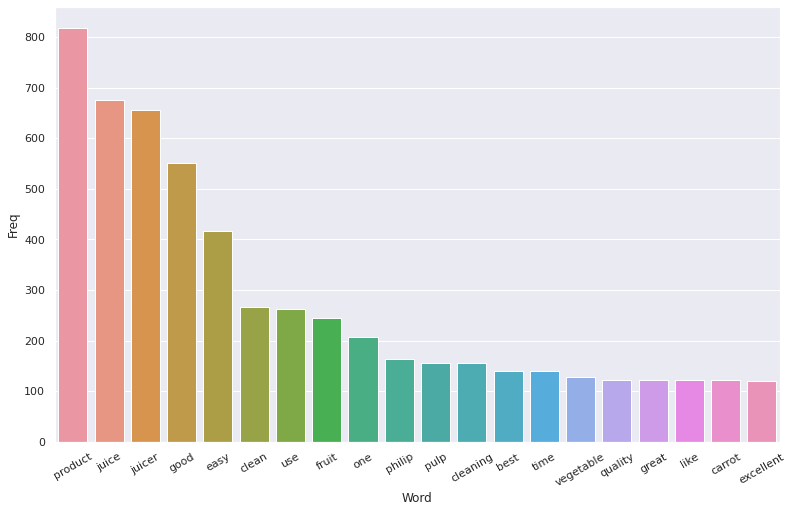

In [73]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)


              Bi-gram  Freq
0        good product   140
1          easy clean   128
2            easy use   114
3     fruit vegetable    54
4        nice product    52
5         good juicer    52
6       great product    45
7         best juicer    44
8   excellent product    43
9        product easy    36
10         make juice    33
11        juice fruit    32
12      easy assemble    30
13       product good    29
14          use clean    27
15      extract juice    26
16    awesome product    24
17        value money    24
18    carrot beetroot    23
19        fresh juice    23


[Text(0, 0, 'good product'),
 Text(0, 0, 'easy clean'),
 Text(0, 0, 'easy use'),
 Text(0, 0, 'fruit vegetable'),
 Text(0, 0, 'nice product'),
 Text(0, 0, 'good juicer'),
 Text(0, 0, 'great product'),
 Text(0, 0, 'best juicer'),
 Text(0, 0, 'excellent product'),
 Text(0, 0, 'product easy'),
 Text(0, 0, 'make juice'),
 Text(0, 0, 'juice fruit'),
 Text(0, 0, 'easy assemble'),
 Text(0, 0, 'product good'),
 Text(0, 0, 'use clean'),
 Text(0, 0, 'extract juice'),
 Text(0, 0, 'awesome product'),
 Text(0, 0, 'value money'),
 Text(0, 0, 'carrot beetroot'),
 Text(0, 0, 'fresh juice')]

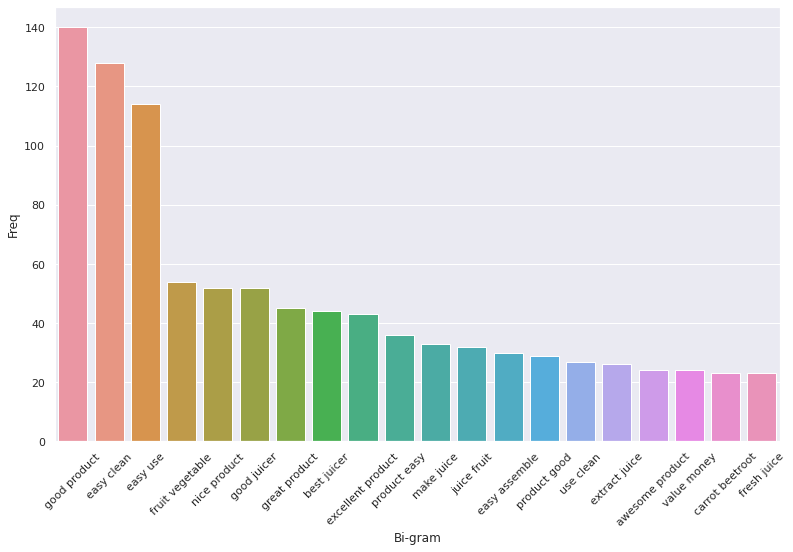

In [75]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                 Tri-gram  Freq
0          easy use clean    24
1        product easy use    22
2           easy use easy    14
3       good product easy    14
4          use easy clean    12
5   juice fruit vegetable    10
6       good amount juice     9
7        best juicer ever     9
8    philip customer care     8
9     assemble easy clean     8
10        one best juicer     8
11          good easy use     7
12   good quality product     7
13  fruit vegetable juice     7
14        juicer easy use     7
15     easy operate clean     7
16        juice every day     7
17     easy assemble easy     7
18     product easy clean     7
19       juicer ever used     6


[Text(0, 0, 'easy use clean'),
 Text(0, 0, 'product easy use'),
 Text(0, 0, 'easy use easy'),
 Text(0, 0, 'good product easy'),
 Text(0, 0, 'use easy clean'),
 Text(0, 0, 'juice fruit vegetable'),
 Text(0, 0, 'good amount juice'),
 Text(0, 0, 'best juicer ever'),
 Text(0, 0, 'philip customer care'),
 Text(0, 0, 'assemble easy clean'),
 Text(0, 0, 'one best juicer'),
 Text(0, 0, 'good easy use'),
 Text(0, 0, 'good quality product'),
 Text(0, 0, 'fruit vegetable juice'),
 Text(0, 0, 'juicer easy use'),
 Text(0, 0, 'easy operate clean'),
 Text(0, 0, 'juice every day'),
 Text(0, 0, 'easy assemble easy'),
 Text(0, 0, 'product easy clean'),
 Text(0, 0, 'juicer ever used')]

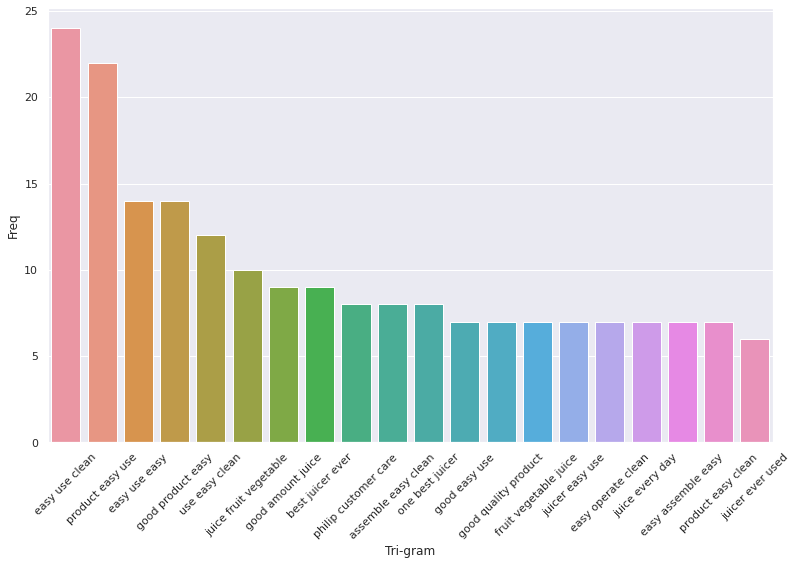

In [77]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)